# Scale, Standardize, or Normalize with scikit-learn
## Когда использовать MinMaxScaler, RobustScaler, StandardScaler, Normalizer

# Зачем масштабировать, стандартизировать или нормализовать?

Многие алгоритмы машинного обучения работают лучше или сходятся быстрее, когда функции находятся в относительно одинаковом масштабе и / или близки к нормальному распределению. Примеры таких семейств алгоритмов включают в себя:

- линейная и логистическая регрессия
- ближайшие соседи
- нейронные сети
- метод опорных векторов с функциями ядра с радиальным смещением
- анализ основных компонентов
- линейный дискриминантный анализ

**_MinMaxScaler_**, **_RobustScaler_**, **_StandardScaler_**, а также **_Normalizer_** это методы предварительной обработки данных для машинного обучения. Какой метод вам нужен, зависит от типа вашей модели и значений данных.

Все эти методы находятся в scikit-learn в модуле preprocessing и имеют одинаковый интерфейс.

In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

Мы рассмотрим несколько распределений и применим к ним каждый из четырех методов scikit-learn.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(42)

# Original Distributions

Let's make several types of random distributions.

In [2]:
#create columns of various distributions
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

# create list of column names to use later
col_names = list(df.columns)

Let's plot our original distributions.

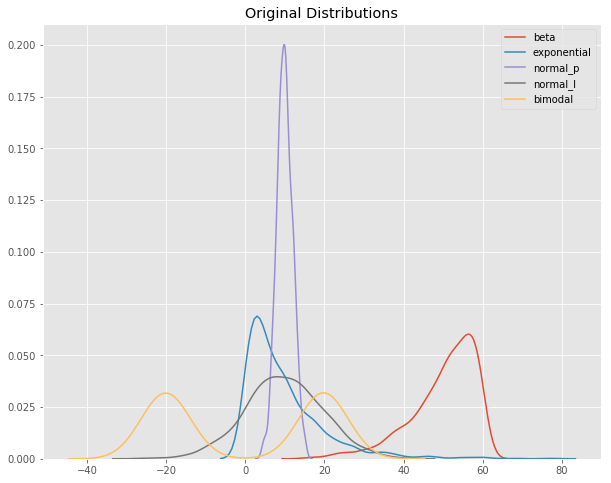

In [3]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);

In [4]:
df.head()

,beta,exponential,normal_l,normal_p,bimodal
0,51.869268,2.274939,13.383840,8.603609,22.412769
1,57.760566,0.693218,0.973003,10.369736,14.483670
2,43.156705,20.984242,19.469285,12.781465,17.555845
3,57.883747,4.933213,-3.971523,10.247835,23.215896
4,50.035295,7.803643,22.220653,8.416581,17.845884


Let's see what are the means are.

In [5]:
df.mean()

beta           50.081126
exponential     9.770392
normal_l        9.802725
normal_p        9.964350
bimodal        -0.135542
dtype: float64

If you'd like more summary statistics:

In [6]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.081126,9.770392,9.802725,9.964350,-0.135542
std,8.308684,10.044748,9.745958,1.985623,20.149049
min,15.535334,0.000307,-25.820626,4.191071,-28.652973
25%,45.961911,2.782905,3.312172,8.640152,-20.052723
50%,52.007932,6.712767,9.802405,9.908674,-0.448078
75%,56.443289,13.261624,16.266848,11.298762,19.824382
max,59.999635,77.235295,40.147117,15.290074,29.269669


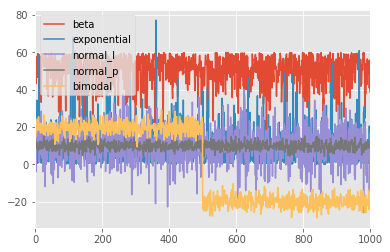

In [7]:
df.plot()

These values are all in the same ballpark.

## Добавим признаки с огромными значениями

Может быть стоимость квартиры, машины и тд

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big

In [9]:
col_names.append('normal_big')

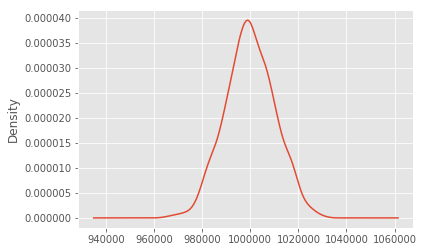

In [10]:
df['normal_big'].plot(kind='kde')

In [11]:
df.normal_big.mean()

999892.7688063366

Получили нормальное распределение со средним в районе 1,000,000.

Если выведем всё на одном графике - ничего не понятно

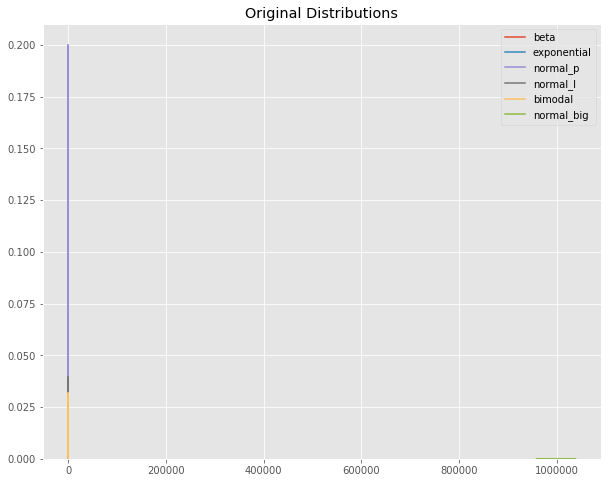

In [12]:
# plot original distribution plot with larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);
sns.kdeplot(df['normal_big'], ax=ax1);

Распределение с огромным средним справа внизу. Теперь посмотрим на график значений:

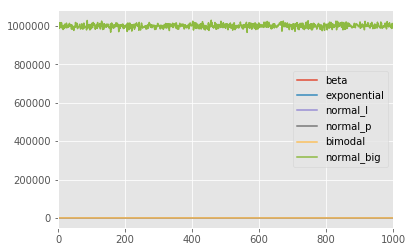

In [13]:
df.plot()

In [14]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.081126,9.770392,9.802725,9.964350,-0.135542,9.998928e+05
std,8.308684,10.044748,9.745958,1.985623,20.149049,1.024718e+04
min,15.535334,0.000307,-25.820626,4.191071,-28.652973,9.665245e+05
25%,45.961911,2.782905,3.312172,8.640152,-20.052723,9.930258e+05
50%,52.007932,6.712767,9.802405,9.908674,-0.448078,9.997777e+05
75%,56.443289,13.261624,16.266848,11.298762,19.824382,1.006852e+06
max,59.999635,77.235295,40.147117,15.290074,29.269669,1.029791e+06


А теперь посмотрим что будет, если мы используем scaling. Сначала заюзаем MinMax Scaler.

# MinMaxScaler 

Для каждого значения в объекте MinMaxScaler вычитает минимальное значение и затем делит на разницу между исходным максимумом и исходным минимумом.

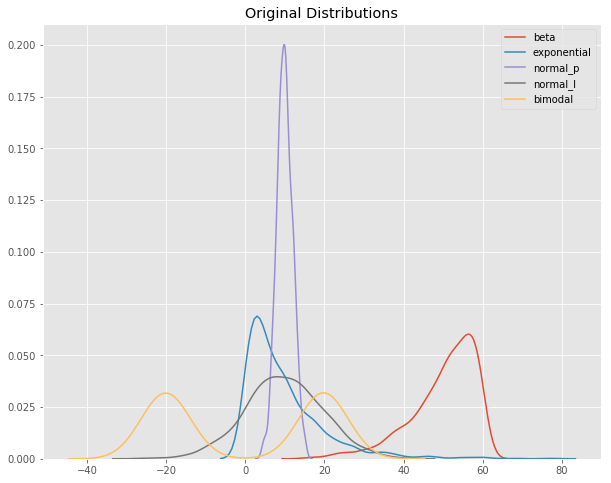

In [15]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);

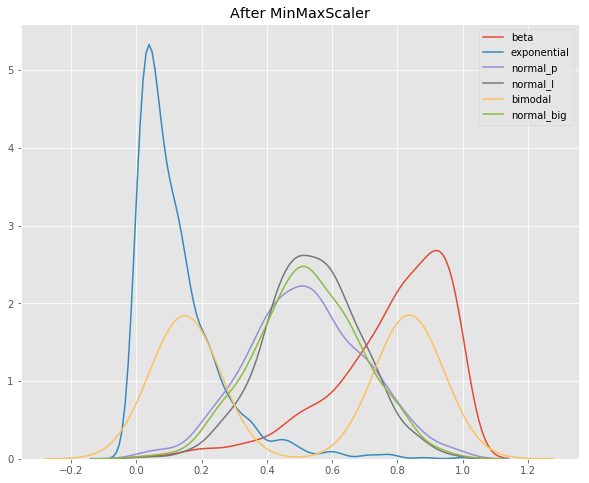

In [16]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1);

Notice how the shape of each distribution remains the same, but now the values are between 0 and 1.

In [19]:
df_mm['beta'].min()

0.0

In [20]:
df_mm['beta'].max()

1.0000000000000002

Let's look at the minimums and maximums for each column prior to scaling.

In [21]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.081126,9.770392,9.802725,9.964350,-0.135542,9.998928e+05
std,8.308684,10.044748,9.745958,1.985623,20.149049,1.024718e+04
min,15.535334,0.000307,-25.820626,4.191071,-28.652973,9.665245e+05
25%,45.961911,2.782905,3.312172,8.640152,-20.052723,9.930258e+05
50%,52.007932,6.712767,9.802405,9.908674,-0.448078,9.997777e+05
75%,56.443289,13.261624,16.266848,11.298762,19.824382,1.006852e+06
max,59.999635,77.235295,40.147117,15.290074,29.269669,1.029791e+06


In [22]:
df_mm.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.776933,0.126498,0.540012,0.520162,0.492337,0.527428
std,0.186862,0.130054,0.147738,0.178901,0.347861,0.161970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684292,0.036028,0.441622,0.400854,0.148478,0.418887
50%,0.820267,0.086910,0.540007,0.515146,0.486941,0.525609
75%,0.920018,0.171701,0.638001,0.640390,0.836933,0.637435
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df["beta"].min(), df["beta"].max()

(15.535334183096182, 59.999635059557114)

In [24]:
np.mean((df["beta"] - df["beta"].min()) / (df["beta"].max() - df["beta"].min()))

0.7769332103212264

Обратим внимание на минимум и максимум для каждого признака после MinMaxScaler.

MinMaxScaler сохраняет форму исходного распределения. Это не приводит к значительному изменению информации, встроенной в исходные данные.

Обратите внимание, что MinMaxScaler не уменьшает важность выбросов.

Диапазон по умолчанию для функции, возвращаемой MinMaxScaler, составляет от 0 до 1.

# RobustScaler

RobustScaler преобразует вектор признаков путем вычитания медианы, а затем деления на диапазон между четвертями (значение 75% - значение 25%).

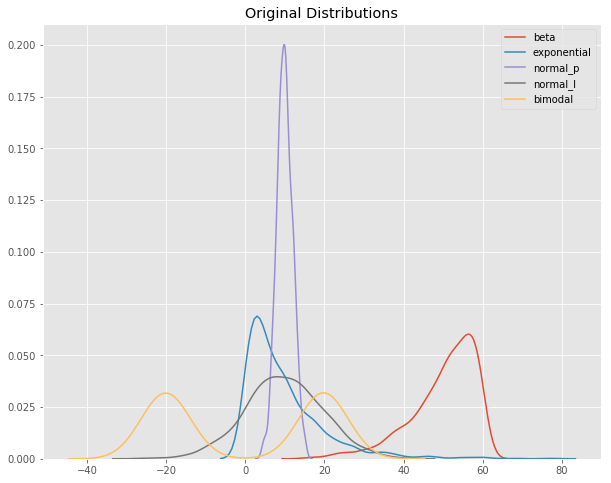

In [25]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);

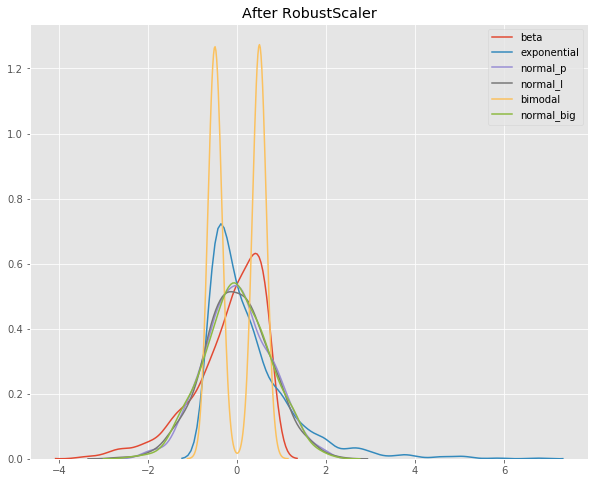

In [26]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1)
sns.kdeplot(df_r['normal_big'], ax=ax1);

Let's check the minimums and maximums for each column after RobustScaler.

In [27]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.081126,9.770392,9.802725,9.964350,-0.135542,9.998928e+05
std,8.308684,10.044748,9.745958,1.985623,20.149049,1.024718e+04
min,15.535334,0.000307,-25.820626,4.191071,-28.652973,9.665245e+05
25%,45.961911,2.782905,3.312172,8.640152,-20.052723,9.930258e+05
50%,52.007932,6.712767,9.802405,9.908674,-0.448078,9.997777e+05
75%,56.443289,13.261624,16.266848,11.298762,19.824382,1.006852e+06
max,59.999635,77.235295,40.147117,15.290074,29.269669,1.029791e+06


In [28]:
df_r.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,-0.183831,2.917939e-01,0.000025,2.094191e-02,0.007837,0.008320
std,0.792709,9.585854e-01,0.752312,7.468651e-01,0.505279,0.741116
min,-3.479752,-6.405801e-01,-2.749820,-2.150598e+00,-0.707295,-2.405003
25%,-0.576835,-3.750327e-01,-0.500995,-4.771371e-01,-0.491627,-0.488326
50%,0.000000,-4.239230e-17,0.000000,3.340698e-16,0.000000,0.000000
75%,0.423165,6.249673e-01,0.499005,5.228629e-01,0.508373,0.511674
max,0.762467,6.730071e+00,2.342375,2.024140e+00,0.745233,2.170645


In [29]:
np.mean((df["beta"] - df["beta"].median()) / (df["beta"].quantile(0.75) - df["beta"].quantile(0.25)))

-0.18383139495388698

Как и MinMaxScaler, в распределении с большими значениями -normal_big- теперь масштаб похож на другие функции. Обратите внимание, что RobustScaler не масштабирует данные в заранее определенный интервал, как MinMaxScaler.

Диапазон для каждой функции после применения RobustScaler больше, чем для MinMaxScaler.

Используйте RobustScaler, если вы хотите уменьшить влияние выбросов по сравнению с MinMaxScaler.

# StandardScaler

StandardScaler is scales each column to have 0 mean and unit variance.

StandardScaler стандартизирует функцию путем вычитания среднего значения, а затем деления на стандартное отклонение.

StandardScaler приводит к распределению со стандартным отклонением, равным 1. Дисперсия также равна 1, поскольку дисперсия = стандартное отклонение в квадрате, 1 в квадрате = 1.

StandardScaler составляет среднее значение распределения 0. Около 68% значений будут находиться в диапазоне от -1 до 1.

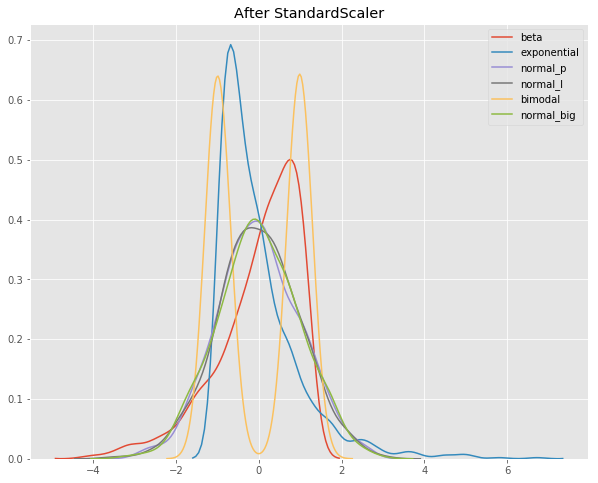

In [30]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)
sns.kdeplot(df_s['normal_big'], ax=ax1);

Qutie a nice chart, don't you think? You can see that all features now have 0 mean.

Let's check the minimums and maximums for each column after StandardScaler.

In [31]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.081126,9.770392,9.802725,9.964350,-0.135542,9.998928e+05
std,8.308684,10.044748,9.745958,1.985623,20.149049,1.024718e+04
min,15.535334,0.000307,-25.820626,4.191071,-28.652973,9.665245e+05
25%,45.961911,2.782905,3.312172,8.640152,-20.052723,9.930258e+05
50%,52.007932,6.712767,9.802405,9.908674,-0.448078,9.997777e+05
75%,56.443289,13.261624,16.266848,11.298762,19.824382,1.006852e+06
max,59.999635,77.235295,40.147117,15.290074,29.269669,1.029791e+06


In [32]:
df_s.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.263256e-17,-1.172396e-16,1.278977e-16,-3.037570e-16,1.705303e-16,2.174261e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.159874e+00,-9.731428e-01,-3.657021e+00,-2.908995e+00,-1.416032e+00,-3.257968e+00
25%,-4.960203e-01,-6.959840e-01,-6.663071e-01,-6.672266e-01,-9.889870e-01,-6.704682e-01
50%,2.320187e-01,-3.045528e-01,-3.291889e-05,-2.805377e-02,-1.551895e-02,-1.123258e-02
75%,7.661076e-01,3.477418e-01,6.635937e-01,6.723732e-01,9.911094e-01,6.795237e-01
max,1.194349e+00,6.719796e+00,3.115094e+00,2.683484e+00,1.460115e+00,2.919120e+00


In [33]:
np.mean((df["beta"] - df["beta"].mean()) / np.std(df["beta"]))

4.263256414560601e-17

На графике выше вы можете видеть, что все четыре распределения имеют среднее значение, близкое к нулю, и единичную дисперсию. Значения в аналогичном масштабе, но диапазон больше, чем после MinMaxScaler.

Алгоритмы глубокого обучения часто требуют нулевого среднего и единичной дисперсии. Алгоритмы регрессионного типа также выигрывают от нормально распределенных данных с небольшими размерами выборки.

StandardScaler искажает относительные расстояния между значениями объектов, поэтому, как правило, это мой второй выбор в этом семействе преобразований.

Диапазон для каждой функции примерно как в RobustScaler.


# Normalizer

Normalizer работает над строками, а не над столбцами, что не очень интуитивно. Эту информацию легко пропустить в документации.

По умолчанию нормализация L2 применяется к каждому наблюдению, так что значения в строке имеют единичную норму. Единица нормы с L2 означает, что если каждый элемент возвести в квадрат и просуммировать, сумма будет равна 1. В качестве альтернативы, вместо нормализации L2 может быть применена нормализация L1.

In [34]:
df.head()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
0,51.869268,2.274939,13.383840,8.603609,22.412769,9.866292e+05
1,57.760566,0.693218,0.973003,10.369736,14.483670,1.012571e+06
2,43.156705,20.984242,19.469285,12.781465,17.555845,1.003369e+06
3,57.883747,4.933213,-3.971523,10.247835,23.215896,9.873310e+05
4,50.035295,7.803643,22.220653,8.416581,17.845884,1.004387e+06


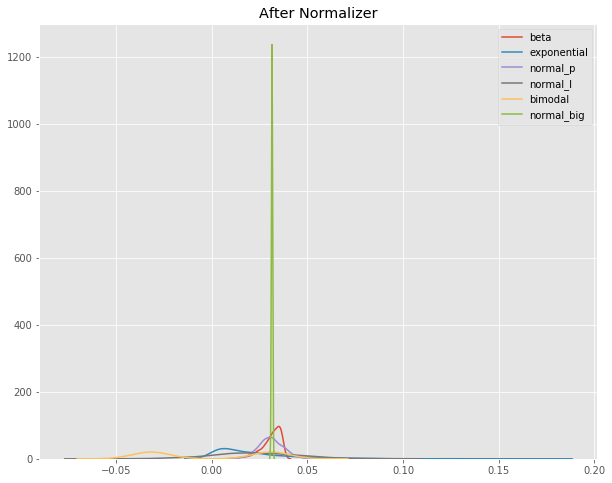

In [40]:
n_scaler = preprocessing.Normalizer(norm="l2")
df_n = n_scaler.fit_transform(df.T)

df_n = pd.DataFrame(df_n.T, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

sns.kdeplot(df_n['beta'], ax=ax1)
sns.kdeplot(df_n['exponential'], ax=ax1)
sns.kdeplot(df_n['normal_p'], ax=ax1)
sns.kdeplot(df_n['normal_l'], ax=ax1)
sns.kdeplot(df_n['bimodal'], ax=ax1)
sns.kdeplot(df_n['normal_big'], ax=ax1);

In [36]:
df.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.081126,9.770392,9.802725,9.964350,-0.135542,9.998928e+05
std,8.308684,10.044748,9.745958,1.985623,20.149049,1.024718e+04
min,15.535334,0.000307,-25.820626,4.191071,-28.652973,9.665245e+05
25%,45.961911,2.782905,3.312172,8.640152,-20.052723,9.930258e+05
50%,52.007932,6.712767,9.802405,9.908674,-0.448078,9.997777e+05
75%,56.443289,13.261624,16.266848,11.298762,19.824382,1.006852e+06
max,59.999635,77.235295,40.147117,15.290074,29.269669,1.029791e+06


In [42]:
(df_n["beta"]**2).sum()

1.0000000000000007

In [37]:
df_n.describe()

,beta,exponential,normal_l,normal_p,bimodal,normal_big
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001000,1.000000e-03,0.000859,0.001000,-0.000007,0.001000
std,0.000166,1.028080e-03,0.000854,0.000199,0.001013,0.000010
min,0.000310,3.144123e-08,-0.002263,0.000421,-0.001441,0.000967
25%,0.000918,2.848304e-04,0.000290,0.000867,-0.001008,0.000993
50%,0.001038,6.870519e-04,0.000859,0.000994,-0.000023,0.001000
75%,0.001127,1.357328e-03,0.001426,0.001134,0.000997,0.001007
max,0.001198,7.905035e-03,0.003519,0.001534,0.001472,0.001030


# Combined Plot

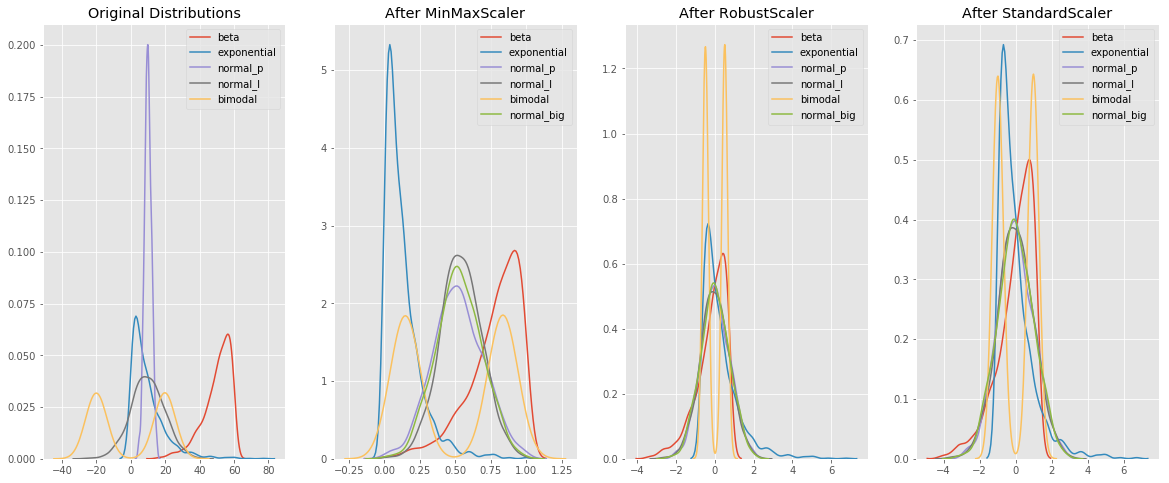

In [43]:
# Combined plot.

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))


ax0.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax0)
sns.kdeplot(df['exponential'], ax=ax0)
sns.kdeplot(df['normal_p'], ax=ax0)
sns.kdeplot(df['normal_l'], ax=ax0)
sns.kdeplot(df['bimodal'], ax=ax0)
#sns.kdeplot(df['normal_big'], ax=ax0);


ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1);


ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax2)
sns.kdeplot(df_r['exponential'], ax=ax2)
sns.kdeplot(df_r['normal_p'], ax=ax2)
sns.kdeplot(df_r['normal_l'], ax=ax2)
sns.kdeplot(df_r['bimodal'], ax=ax2)
sns.kdeplot(df_r['normal_big'], ax=ax2);


ax3.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax3)
sns.kdeplot(df_s['exponential'], ax=ax3)
sns.kdeplot(df_s['normal_p'], ax=ax3)
sns.kdeplot(df_s['normal_l'], ax=ax3)
sns.kdeplot(df_s['bimodal'], ax=ax3)
sns.kdeplot(df_s['normal_big'], ax=ax3);

Обратите внимание, что после любого из этих трех преобразований значения находятся в аналогичном масштабе. Также обратите внимание, что MinMaxScaler не искажает расстояния между значениями в каждой функции.

Summary:
- Используйте MinMaxScaler по умолчанию, если вы хотите преобразовать признаки. Он их не искажает
- Вы можете использовать RobustScaler, если у вас есть выбросы и вы хотите уменьшить их влияние. Тем не менее, вам лучше удалить выбросы.
- Используйте StandardScaler, если вам нужно относительно нормальное распределение признака.
- Используйте Normalizer осторожно - он нормализует строки выборки, а не столбцы. Можно транспонировать и использовать. Он может использовать нормализацию l2 или l1.

# Трансформация значений

In [44]:
dataset = pd.read_csv("./train.csv")

In [45]:
dataset.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [47]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [48]:
from sklearn.model_selection import StratifiedKFold

In [49]:
X = dataset.values[:, :-1]
y = dataset.values[:, -1].astype(int)
X_scaled = mm_scaler.fit_transform(X)

In [50]:
from sklearn.metrics import precision_score

In [51]:
lr = LogisticRegression()

In [52]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
skf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [54]:
ans = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    ans.append(np.sum(preds == y_test) * 1. / y_test.size)

In [55]:
np.mean(ans)

0.7705

In [56]:
ans = []
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    ans.append(np.sum(preds == y_test) * 1. / y_test.size) 

In [57]:
np.mean(ans)

0.785

In [58]:
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold, StratifiedKFold, cross_val_predict

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_predict = cross_val_predict(lr, X_scaled, y,
                                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                          method='predict')
print(np.sum(y_predict == y) * 1. / y.size)

0.785


In [61]:
y_predict = cross_val_predict(lr, X, y,
                                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                          method='predict')
print(np.sum(y_predict == y) * 1. / y.size)

0.7705


In [62]:
cf_matrix = confusion_matrix(y, y_predict)

In [63]:
np.sum((y_predict == 1) & (y == 0))

35

In [64]:
np.sum((y_predict == 1) & (y == 2))

104

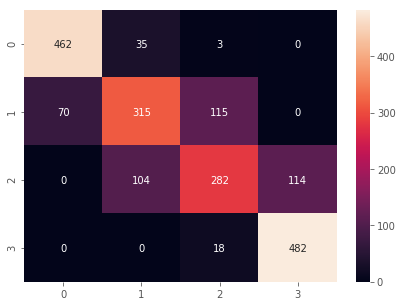

In [65]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.heatmap(cf_matrix, annot=True, fmt='.4g')

## Предобработка категориальных признаков

In [66]:
dataset2 = pd.read_csv("./pizza_v2.csv")

In [67]:
dataset2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [69]:
dataset2["price_rupiah"] = dataset2["price_rupiah"].apply(lambda x: int(x.replace("Rp", "").replace(",", "")))

In [70]:
dataset2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [72]:
dataset2["diameter"] = dataset2["diameter"].apply(lambda x: float(x.replace(" inch", "")))

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
dataset2["company"].value_counts()

E    30
C    30
A    25
B    24
D    20
Name: company, dtype: int64

In [75]:
le = LabelEncoder()
dataset2["company"] = le.fit_transform(dataset2["company"])
dataset2["topping"] = le.fit_transform(dataset2["topping"])
dataset2["variant"] = le.fit_transform(dataset2["variant"])
dataset2["size"] = le.fit_transform(dataset2["size"])
dataset2["extra_sauce"] = le.fit_transform(dataset2["extra_sauce"])
dataset2["extra_cheese"] = le.fit_transform(dataset2["extra_cheese"])
dataset2["extra_mushrooms"] = le.fit_transform(dataset2["extra_mushrooms"])

In [76]:
dataset2["company"].value_counts()

4    30
2    30
0    25
1    24
3    20
Name: company, dtype: int64

In [84]:
new_ohe_features_company

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [ ]:
dataset2["company"].value_counts()

In [77]:
X = dataset2.drop(columns=["price_rupiah"]).values
y = dataset2["price_rupiah"].values

In [78]:
L = LinearRegression()

In [79]:
y_predict = cross_val_predict(L, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                                          method='predict')

In [80]:
dataset2.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,87151.162791,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667,0.558140
std,1.435381,44706.097732,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242,0.498544
min,0.000000,23500.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51000.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,78000.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000,1.000000
75%,3.000000,105000.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000,1.000000
max,4.000000,248000.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000,1.000000


In [81]:
np.mean(np.abs(y_predict - y))

18291.64526175424

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
ohe = OneHotEncoder(sparse=False)
new_ohe_features_company = ohe.fit_transform(dataset2[["company"]])
new_ohe_features_topping = ohe.fit_transform(dataset2[["topping"]])
new_ohe_features_variant = ohe.fit_transform(dataset2[["variant"]])
new_ohe_features_size = ohe.fit_transform(dataset2[["size"]])
new_ohe_features_extra_sauce = ohe.fit_transform(dataset2[["extra_sauce"]])
new_ohe_features_extra_cheese = ohe.fit_transform(dataset2[["extra_cheese"]])
new_ohe_features_extra_mushrooms = ohe.fit_transform(dataset2[["extra_mushrooms"]])
new_ohe_features_diameter = dataset2[["diameter"]]

In [85]:
X_encoded = np.hstack((new_ohe_features_company, new_ohe_features_diameter.values, 
                       new_ohe_features_extra_cheese, new_ohe_features_extra_mushrooms, 
                       new_ohe_features_extra_sauce, new_ohe_features_size,
                       new_ohe_features_topping, new_ohe_features_variant))

In [86]:
y_predict = cross_val_predict(L, X_encoded, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                                          method='predict')

In [87]:
np.mean(np.abs(y_predict - y))

14659.863236272358